In [8]:
"""
Introduction

Liquidation in finance and economics is the process of bringing a business to an end and distributing its 
assets to claimants. It is an event that usually occurs when a company is insolvent, meaning it cannot pay
its obligations when they are due. (https://www.investopedia.com/terms/l/liquidation.asp)

In this study, I will try to build a linear regression model to forecast next month's numbers by using seasonality and trend.

"""

from evds import evdsAPI
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

evds = evdsAPI('Er16YO2Bhy')

#Import Data

data=evds.get_data(['TP.KAP2.TOP.A'], startdate="01-04-2013", enddate="01-04-2021", frequency=5)


Tarih  TP_KAP2_TOP_A
0    2013-4         1093.0
1    2013-5         1184.0
2    2013-6         1203.0
3    2013-7         1548.0
4    2013-8         1038.0
..      ...            ...
91  2020-11          986.0
92  2020-12         3179.0
93   2021-1          958.0
94   2021-2          775.0
95   2021-3         1015.0

[96 rows x 2 columns]

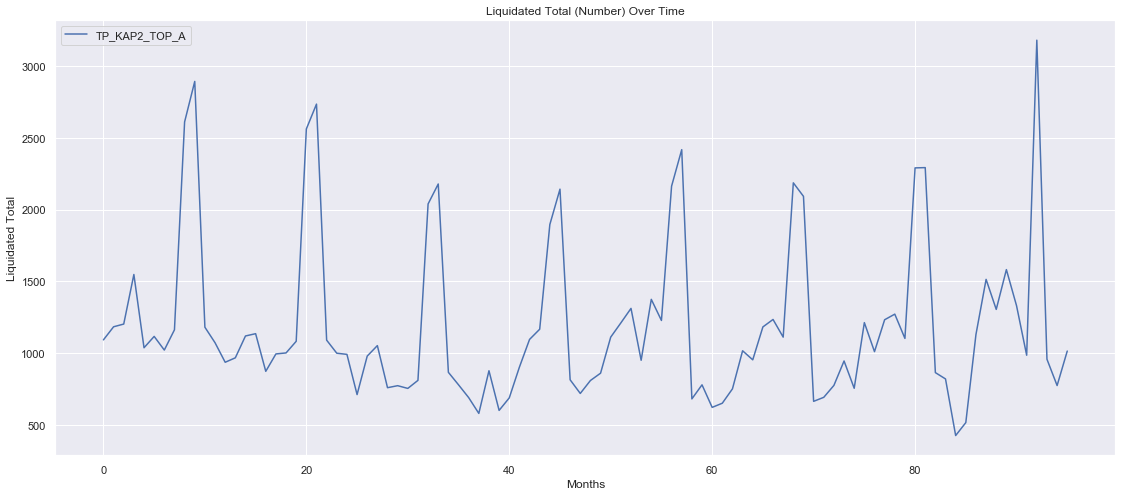

In [19]:
sns.set()
ax = data.plot()
ax.set(xlabel='Months', ylabel='Liquidated Total', title="Liquidated Total (Number) Over Time")
plt.show()

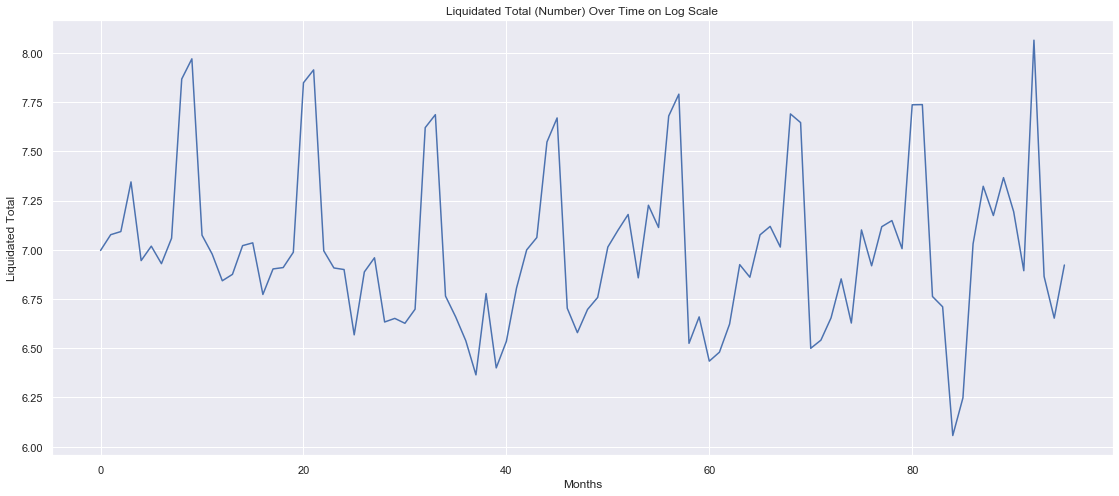

Tarih  TP_KAP2_TOP_A
0    2013-4       6.996681
1    2013-5       7.076654
2    2013-6       7.092574
3    2013-7       7.344719
4    2013-8       6.945051
..      ...            ...
91  2020-11       6.893656
92  2020-12       8.064322
93   2021-1       6.864848
94   2021-2       6.652863
95   2021-3       6.922644

[96 rows x 2 columns]

In [32]:
#Since the variance of data is high, 
logdata = data.copy()
logdata.TP_KAP2_TOP_A = np.log(data.TP_KAP2_TOP_A)

ax = sns.lineplot(data = np.log(data.TP_KAP2_TOP_A))
ax.set(xlabel='Months', ylabel='Liquidated Total', title="Liquidated Total (Number) Over Time on Log Scale")
plt.show()
logdata

In [80]:
#There is a strong seasonality. Also, In March and April 2020, there is a serious fall because of the Covid-19 lockdown
#Let's add these to data

logdata["iscovid"] = 0
logdata.loc[[83,84],"iscovid"]=1

logdata["trend"] = list(range(1, len(data)+1))

months = []

for i in range(len(logdata)):
    months.append((i+3)%12+1)

logdata["month"] = months
#logdata.month = pd.Categorical(logdata.month)

logdata["constant"] = 1

logdata

Tarih  TP_KAP2_TOP_A  iscovid  trend  month  constant
0    2013-4       6.996681        0      1      4         1
1    2013-5       7.076654        0      2      5         1
2    2013-6       7.092574        0      3      6         1
3    2013-7       7.344719        0      4      7         1
4    2013-8       6.945051        0      5      8         1
..      ...            ...      ...    ...    ...       ...
91  2020-11       6.893656        0     92     11         1
92  2020-12       8.064322        0     93     12         1
93   2021-1       6.864848        0     94      1         1
94   2021-2       6.652863        0     95      2         1
95   2021-3       6.922644        0     96      3         1

[96 rows x 6 columns]

In [81]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

lm = LinearRegression()
y = logdata.TP_KAP2_TOP_A

X = logdata[["trend", "constant","iscovid"]]
X = pd.concat((X, pd.get_dummies(logdata['month'], drop_first=True)), axis=1)

base_model = OLS(y,X).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TP_KAP2_TOP_A   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     16.96
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.14e-18
Time:                        22:59:30   Log-Likelihood:                 12.493
No. Observations:                  96   AIC:                             3.015
Df Residuals:                      82   BIC:                             38.92
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         -0.0012      0.001     -1.338      0.185      -0.003       0.001
constant       7.7202      0.093     82.974      0.000       7.535       7.905
iscovid       -0.3048      0.177     -1.718      0.090      -0.658       0.048
2             -0.9113      0.115     -7.928      0.000      -1.140      -0.683
3             -0.8744      0.117     -7.474      0.000      -1.107      -0.642
4             -0.9920      0.118     -8.435      0.000      -1.226      -0.758
5             -1.0161      0.115     -8.824      0.000      -1.245      -0.787
6             -0.7836      0.115     -6.808      0.000      -1.013      -0.555
7             -0.6433      0.115     -5.591      0.000      -0.872      -0.414
8             -0.7880      0.115     -6.852      0.000      -1.017      -0.559
9             -0.6899      0.115     -6.000      0.000      -0.919      -0.461
10            -0.6441      0.115     -5.602      0.000      -0.873      -0.415
11            -0.6828      0.115     -5.940      0.000      -0.911      -0.454
12             0.0958      0.115      0.833      0.407      -0.133       0.324
==============================================================================
Omnibus:                        8.871   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.841
Skew:                          -0.610   Prob(JB):                       0.0120
Kurtosis:                       3.850   Cond. No.                         700.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

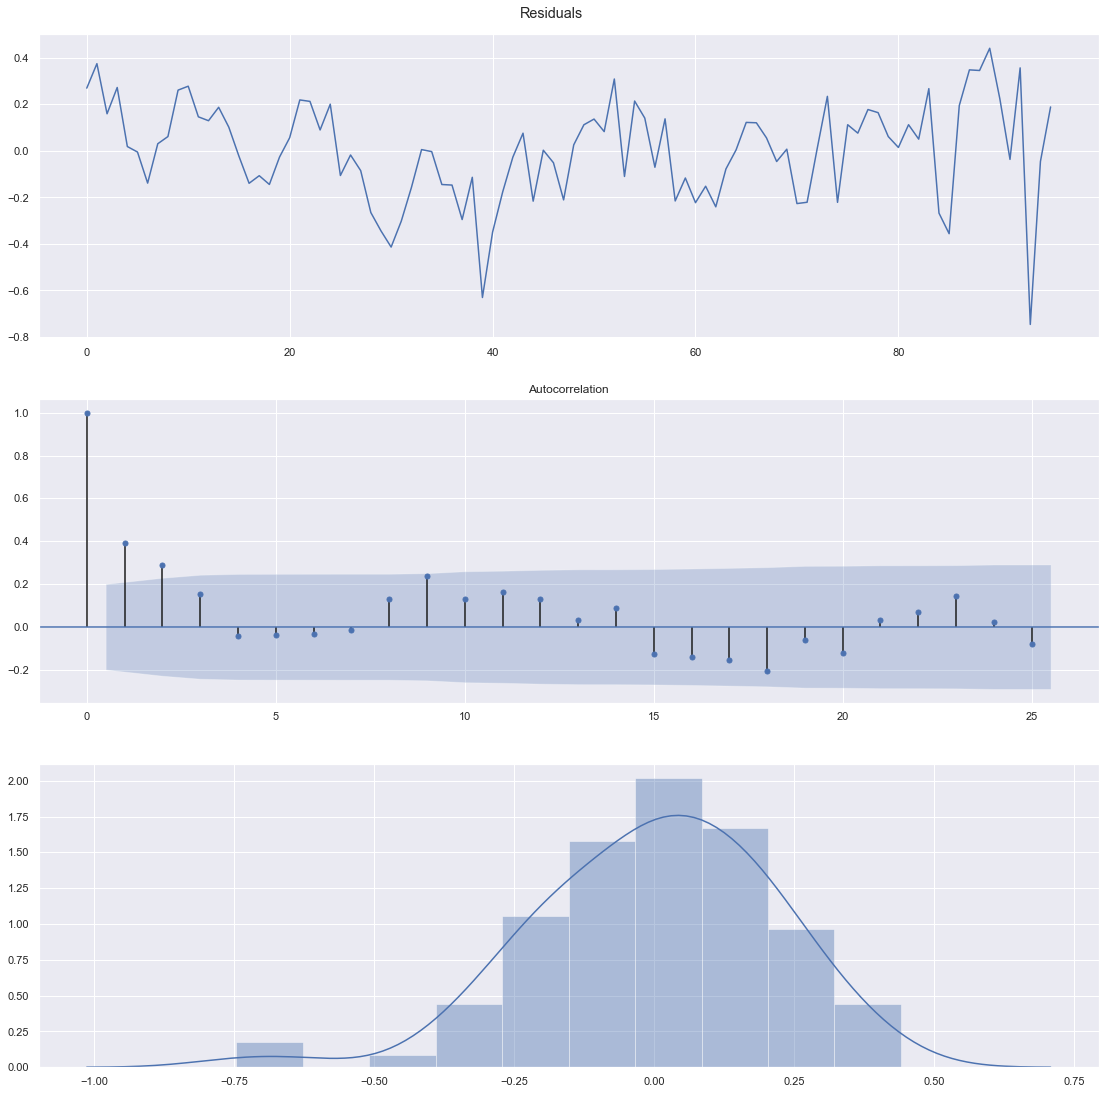

In [94]:
#All data we add is significant, let's check the residuals

sns.set()


fig, axs = plt.subplots(3,1)
fig.suptitle('Residuals', y = 0.9)

sns.lineplot(data = base_model.resid, ax = axs[0])
sm.graphics.tsa.plot_acf(base_model.resid, lags=25, ax = axs[1])
sns.distplot(base_model.resid, ax = axs[2])

In [97]:
"""
Distribution seems normal, there is a fall in 2016. Reason must be coup attempt in 15th July. Variance looks constant.
Lets add iscoup
Also I will add covid constant on January-2021

"""
logdata["iscoup"]=0
logdata.loc[[39],"iscoup"]=1
logdata.loc[[93],"iscovid"]=1


X = logdata[["trend", "constant","iscovid","iscoup"]]
X = pd.concat((X, pd.get_dummies(logdata['month'], drop_first=True)), axis=1)

base_model = OLS(y,X).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TP_KAP2_TOP_A   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.59e-21
Time:                        23:17:19   Log-Likelihood:                 24.052
No. Observations:                  96   AIC:                            -18.10
Df Residuals:                      81   BIC:                             20.36
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         -0.0007      0.001     -0.928      0.356      -0.002       0.001
constant       7.7610      0.083     93.738      0.000       7.596       7.926
iscovid       -0.5062      0.131     -3.861      0.000      -0.767      -0.245
iscoup        -0.7171      0.219     -3.271      0.002      -1.153      -0.281
2             -0.9750      0.104     -9.387      0.000      -1.182      -0.768
3             -0.9134      0.103     -8.908      0.000      -1.117      -0.709
4             -1.0263      0.103     -9.986      0.000      -1.231      -0.822
5             -1.0759      0.104    -10.369      0.000      -1.282      -0.869
6             -0.8438      0.104     -8.134      0.000      -1.050      -0.637
7             -0.6143      0.107     -5.725      0.000      -0.828      -0.401
8             -0.8492      0.104     -8.186      0.000      -1.056      -0.643
9             -0.7514      0.104     -7.243      0.000      -0.958      -0.545
10            -0.7060      0.104     -6.805      0.000      -0.912      -0.500
11            -0.7452      0.104     -7.181      0.000      -0.952      -0.539
12             0.0329      0.104      0.317      0.752      -0.174       0.239
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.206
Skew:                           0.061   Prob(JB):                        0.547
Kurtosis:                       2.465   Cond. No.                         711.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

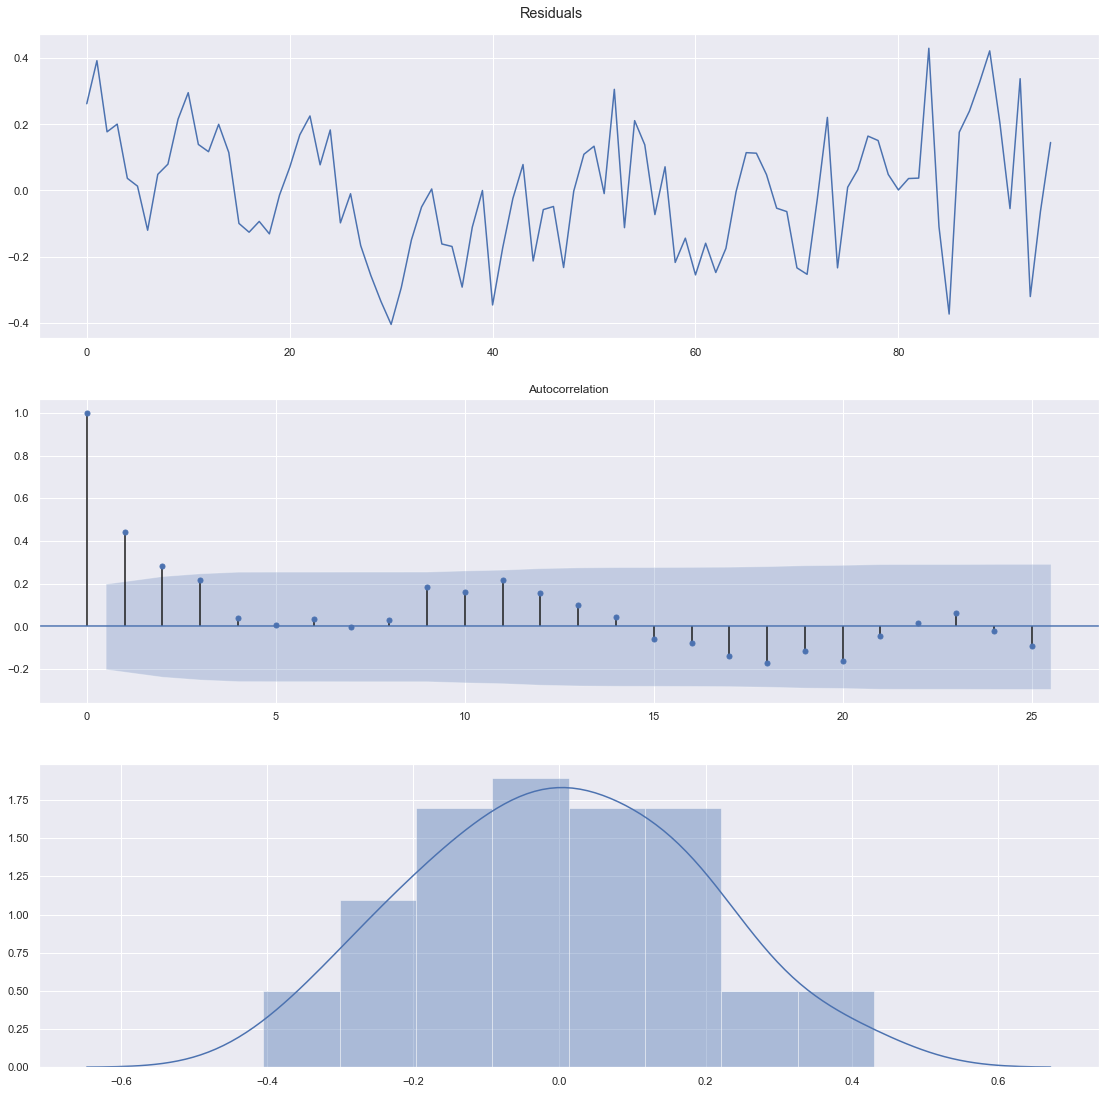

In [98]:
sns.set()

fig, axs = plt.subplots(3,1)
fig.suptitle('Residuals', y = 0.9)

sns.lineplot(data = base_model.resid, ax = axs[0])
sm.graphics.tsa.plot_acf(base_model.resid, lags=25, ax = axs[1])
sns.distplot(base_model.resid, ax = axs[2])

In [119]:
#Now it's better.
#let's add our forecasting month: April 2021


nextmonth = {'Tarih':"2021-4", 'TP_KAP2_TOP_A':0 ,'iscovid':1, 'trend': 97, 'month':4 ,'constant':1, 'iscoup':0}
newdata=logdata
newdata.append(nextmonth,ignore_index=True)

"""
Conclusion

In our model, we can see Covid-19 and 15th July coup attempt effects. We add these in our model and seasonality.
We could may search corelation between our model with exchange rates of USD/TRY or EUR/TRY, or inflation rate etc.

I couldn't find forecasted value in python but I checked April 2021 'iscovid' because of the fully lockdown. We have
good R-squared value (0.78) and P value (1.59e-21). 


"""

Tarih  TP_KAP2_TOP_A  iscovid  trend  month  constant  iscoup
0    2013-4       6.996681        0      1      4         1       0
1    2013-5       7.076654        0      2      5         1       0
2    2013-6       7.092574        0      3      6         1       0
3    2013-7       7.344719        0      4      7         1       0
4    2013-8       6.945051        0      5      8         1       0
..      ...            ...      ...    ...    ...       ...     ...
92  2020-12       8.064322        0     93     12         1       0
93   2021-1       6.864848        1     94      1         1       0
94   2021-2       6.652863        0     95      2         1       0
95   2021-3       6.922644        0     96      3         1       0
96   2021-4       0.000000        1     97      4         1       0

[97 rows x 7 columns]